# Regression and Classification

In this project, we will preprocess the dataset and perform some basic regression and classification tasks. The learning outcome of this part is to know how one can pre-process a real-world dataset and perform a supervised learning task, and to understand some of the fundamental mechanisms behind these tasks.

## OUTLINE: 

Data pre-processing, regression task and classification procedure:

1. Reading the files
2. Missing Values
3. Imputing categorical variables
4. Imputing numerical variables
5. Classification with Decision Tree, single split
6. Classification with Decision Tree, Cross validation
7. Interpretation of the results

To ensure consistent results, every operation in which we can use a random seed has it set to 8.

In [415]:
# these are the libraries that you will need throughout the assignment
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from matplotlib.colors import ListedColormap


RSEED = 8

## *1.* Reading the files

### `We read the datasets using pandas. We will use the files called cleveland.data and switzerland.data`

The datasets contain information about adult patients from the US and from Switzerland. You can find more information in the heart-disease.names file in the 'data' folder.

In [416]:
# From the folder 'data', read the files cleveland.data and switzerland.data into the dataframes cleveland and test, respectively.
# Make sure to add the names of the variables to both dataframes.
columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num' ] # you can find the column names in the file 'data/heart-disease.names'.
cleveland_data = pd.read_csv("../data/cleveland.data", header='infer', names=columns)
test_data = pd.read_csv("../data/switzerland.data", header='infer', names=columns)
# Select the correct column names for the dataset, as described in the file.

cleveland = pd.DataFrame(cleveland_data)  # change this
test = pd.DataFrame(test_data)       # change this

In [417]:
# do not delete this!
cleveland.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [418]:
# do not delete this!
test.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,32.0,1.0,1.0,95.0,0.0,?,0,127.0,0.0,0.7,1,?,?,1.0
1,34.0,1.0,4.0,115.0,0.0,?,?,154.0,0.0,0.2,1,?,?,1.0
2,36.0,1.0,4.0,110.0,0.0,?,0,125.0,1.0,1.0,2,?,6,1.0
3,38.0,0.0,4.0,105.0,0.0,?,0,166.0,0.0,2.8,1,?,?,2.0
4,38.0,0.0,4.0,110.0,0.0,0,0,156.0,0.0,0.0,2,?,3,1.0


In [419]:
# if you want to see information about the dataset, uncomment:
cleveland.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,60.270627,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,77.296578,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,0.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,999.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [420]:
# if you want to see information about the dataset, uncomment:
test.describe()

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,num
count,122.000000,117.000000,117.000000,117.000000,117.0,117.000000,117.000000,117.000000,117.000000
mean,82.409836,0.914530,3.683761,129.957265,0.0,122.299145,0.435897,0.653846,1.769231
std,170.211621,0.280782,0.702822,22.423200,0.0,25.759921,0.498007,1.056061,1.011866
min,0.000000,0.000000,1.000000,80.000000,0.0,60.000000,0.000000,-2.600000,0.000000
25%,48.500000,1.000000,4.000000,115.000000,0.0,105.000000,0.000000,0.000000,1.000000
50%,56.000000,1.000000,4.000000,125.000000,0.0,121.000000,0.000000,0.300000,2.000000
75%,61.000000,1.000000,4.000000,145.000000,0.0,141.000000,1.000000,1.500000,3.000000
max,999.000000,1.000000,4.000000,200.000000,0.0,182.000000,1.000000,3.700000,4.000000


## *2.* Missing values

### `We produce a plot with two subplots, each showing a bar plot of the 'missing' values (either encoded as NaN, or encoded with values that should not be in the dataset) for each feature for the two dataframes. For clarity, the plot has a name, and the bars are named using the feature names.`

age         4
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        7
num         0
dtype: int64
age          12
sex           5
cp            5
trestbps      5
chol        122
fbs          76
restecg       6
thalach       5
exang         5
oldpeak      16
slope        16
ca          117
thal         56
num           5
dtype: int64


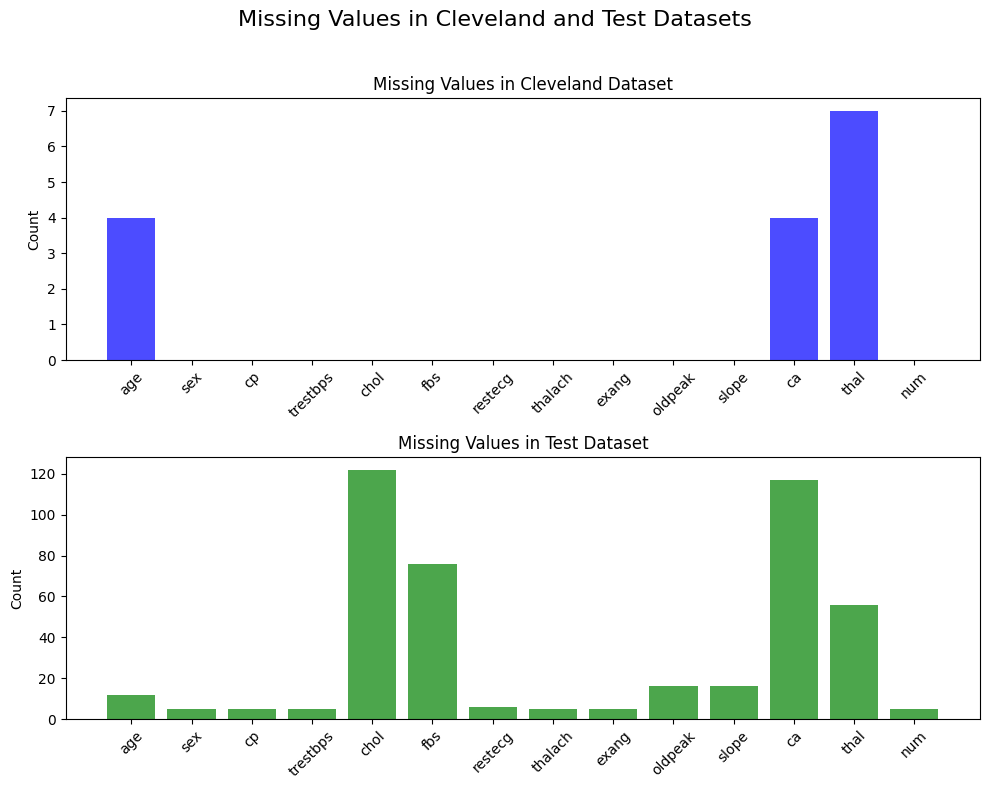

      age  sex   cp  trestbps  chol fbs restecg  thalach  exang  oldpeak  \
0    32.0  1.0  1.0      95.0   0.0   ?       0    127.0    0.0      0.7   
1    34.0  1.0  4.0     115.0   0.0   ?       ?    154.0    0.0      0.2   
2    36.0  1.0  4.0     110.0   0.0   ?       0    125.0    1.0      1.0   
3    38.0  0.0  4.0     105.0   0.0   ?       0    166.0    0.0      2.8   
4    38.0  0.0  4.0     110.0   0.0   0       0    156.0    0.0      0.0   
..    ...  ...  ...       ...   ...  ..     ...      ...    ...      ...   
112  70.0  1.0  4.0     115.0   0.0   0       1     92.0    1.0      0.0   
113  70.0  1.0  4.0     140.0   0.0   1       0    157.0    1.0      2.0   
114  72.0  1.0  3.0     160.0   0.0   ?       2    114.0    0.0      1.6   
115  73.0  0.0  3.0     160.0   0.0   0       1    121.0    0.0      0.0   
116  74.0  1.0  2.0     145.0   0.0   ?       1    123.0    0.0      1.3   

    slope ca thal  num  
0       1  ?    ?  1.0  
1       1  ?    ?  1.0  
2       2  ?

In [421]:
# Create 1 figure with a set of 2 subplots. Each axes should contain a figure as described below: 
# subplot 1: A barplot with the missing valies for each attribute in the dataset 'cleveland'
# subplot 2: A barplot with the missing valies for each attribute in the dataset 'test'

# Write your code here
def countMissingVal(df):
    tempData = pd.DataFrame(data=df, columns=df.columns) 
    result = tempData.isna().sum() + (tempData == 999).sum()  + (tempData == '?').sum() + (tempData == '!').sum()
    result['age'] = result['age'] + (tempData['age'] == 0).sum()
    result['cp'] = result['cp'] + (tempData['cp'] == 0).sum()
    result['trestbps'] = result['trestbps'] + (tempData['trestbps'] == 0).sum()
    result['chol'] = result['chol'] + (tempData['chol'] == 0).sum()
    result['thalach'] = result['thalach'] + (tempData['thalach'] == 0).sum()
    result['slope'] = result['slope'] + (tempData['slope'] == 0).sum()
    result['thal'] = result['thal'] + (tempData['thal'] == 0).sum()
    result['oldpeak'] = result['oldpeak'] + (tempData['oldpeak'] < 0).sum()
    print(result)
    return result
# Calculate missing values for each dataframe
missing_values_cleveland = countMissingVal(cleveland)
missing_values_test = countMissingVal(test)

# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot the missing values for 'cleveland' dataset
axs[0].bar(missing_values_cleveland.index, missing_values_cleveland, color='blue', alpha=0.7)
axs[0].set_title('Missing Values in Cleveland Dataset')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)

# Plot the missing values for 'test' dataset
axs[1].bar(missing_values_test.index, missing_values_test, color='green', alpha=0.7)
axs[1].set_title('Missing Values in Test Dataset')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x', rotation=45)

# Set the overall title for the figure
fig.suptitle('Missing Values in Cleveland and Test Datasets', fontsize=16)

# Adjust layout for better display
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()

# From the graph, we can see that we don't have enough data to impute chol and ca so we will drop those 2 columns from  both training and testing datasets. 
# Also, we can drop the last 5 rows from testing dataset since they dont have any values.
#cleveland.drop(['chol', 'ca'], axis = 1, inplace = True)
#test.drop(['chol', 'ca'], axis = 1, inplace = True)
test.dropna(subset=['num'], inplace = True)
print(test)

## *3.* Imputing categorical variables

In the file 'data/heart-disease.names' we can find, together with the names of the columns, a description of their contents.

We determine which columns are categorical, and set their type to object.

We determine which columns are numerical, and set their type accordingly.

In [422]:
categorical_columns = ['sex', 'cp', 'restecg','fbs', 'exang', 'slope', 'ca', 'thal']  # num is categorical but we dont want to impute num so not adding it here
numerical_columns_int = ['age', 'trestbps', 'chol', 'thalach']      
numerical_columns_float = ['oldpeak']    

### ` Split the cleveland dataframe in a train and a validation set. `

The size of the validation set is 30% of the total size of the cleveland dataframe.

In [423]:
# Split the data into X and y, where X contains the features and y contains the target variable.
X_cleveland = pd.DataFrame(data=cleveland, columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'])  # change this
y_cleveland = pd.DataFrame(data=cleveland, columns=['num'])  # change this

X_test = pd.DataFrame(data=test, columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'])       # change this
y_test = pd.DataFrame(data=test, columns=['num'])       # change this 

X_cleveland = X_cleveland.reset_index(drop=True)
y_cleveland = y_cleveland.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

print(X_cleveland)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca thal  
0      3.0  0.0  6.0  
1    

In [424]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(
    cleveland,
    test_size=0.3,       # 30% of remaining data for validation, resulting in 70% train, 30% validation
    shuffle=True,
    stratify=y_cleveland,
    random_state=RSEED
)
X_train = pd.DataFrame(data=train, columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'])
X_val = pd.DataFrame(data=val, columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'])
y_train = pd.DataFrame(data=train, columns=['num'])
y_val = pd.DataFrame(data=val, columns=['num'])

X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)

print(X_train)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    55.0  0.0  4.0     180.0  327.0  0.0      1.0    117.0    1.0      3.4   
1    39.0  0.0  3.0      94.0  199.0  0.0      0.0    179.0    0.0      0.0   
2    62.0  0.0  3.0     130.0  263.0  0.0      0.0     97.0    0.0      1.2   
3    66.0  0.0  3.0     146.0  278.0  0.0      2.0    152.0    0.0      0.0   
4    42.0  1.0  4.0     136.0  315.0  0.0      0.0    125.0    1.0      1.8   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
207  59.0  1.0  3.0     150.0  212.0  1.0      0.0    157.0    0.0      1.6   
208  40.0  1.0  4.0     110.0  167.0  0.0      2.0    114.0    1.0      2.0   
209  44.0  1.0  2.0     120.0  220.0  0.0      0.0    170.0    0.0      0.0   
210  48.0  0.0  3.0     130.0  275.0  0.0      0.0    139.0    0.0      0.2   
211  46.0  1.0  2.0     101.0  197.0  1.0      0.0    156.0    0.0      0.0   

     slope   ca thal  
0      2.0  0.0  3.0  
1    

In [425]:
# DO NOT DELETE/CHANGE THIS CELL
X_train.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,55.0,0.0,4.0,180.0,327.0,0.0,1.0,117.0,1.0,3.4,2.0,0.0,3.0
1,39.0,0.0,3.0,94.0,199.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0
2,62.0,0.0,3.0,130.0,263.0,0.0,0.0,97.0,0.0,1.2,2.0,1.0,7.0
3,66.0,0.0,3.0,146.0,278.0,0.0,2.0,152.0,0.0,0.0,2.0,1.0,3.0
4,42.0,1.0,4.0,136.0,315.0,0.0,0.0,125.0,1.0,1.8,2.0,0.0,6.0


In [426]:
# DO NOT DELETE/CHANGE THIS CELL
X_val.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,999.0,1.0,4.0,140.0,293.0,0.0,2.0,170.0,0.0,1.2,2.0,2.0,7.0
1,57.0,1.0,3.0,150.0,168.0,0.0,0.0,174.0,0.0,1.6,1.0,0.0,3.0
2,60.0,0.0,3.0,120.0,178.0,1.0,0.0,96.0,0.0,0.0,1.0,0.0,3.0
3,68.0,0.0,3.0,120.0,211.0,0.0,2.0,115.0,0.0,1.5,2.0,0.0,3.0
4,64.0,1.0,3.0,140.0,335.0,0.0,0.0,158.0,0.0,0.0,1.0,0.0,3.0


In [427]:
# To make the classification task easier, transform the target variable into a binary variable.
# If the target variable is 0, it should remain 0. If the target variable is different from 0, it should be transformed into 1.
y_train = y_train.map(lambda x: 0 if x == 0 else 1)
y_val = y_val.map(lambda x: 0 if x == 0 else 1)
y_test = y_test.map(lambda x: 0 if x == 0 else 1)

### ` Impute the missing values in the categorical columns using a KNNImputer from sklearn for the imputation process. `

In [429]:
# 1. Create a subset of the train dataset with only the categorical columns. Call this subset train_cat.
# 2. Create a subset of the val dataset with only the categorical columns. Call this subset val_cat.
# 3. Create a subset of the test dataset with only the categorical columns. Call this subset test_cat
# 4. Impute the three datasets using a KNN imputer with k=5 and weights set to distance
# 5. Save the results in train_imputed_knn, val_imputed_knn, and test_imputed_knn.
# 6. Make sure to add the column names to the resulting dataframes. DO NOT SKIP THIS STEP.
# The new values might have new values that are not in the original dataset.
# Approximate them to the nearest value in the original dataset, for each column.
# To do so, you can store the original values of each column in a dictionary or a list.
# if a new value is equidistant from two original values, choose the largest one.
# (Example: if the original values are [1, 3] and the new value is 2, it will become 3)

from sklearn.impute import KNNImputer

# Write your code here
columns_to_impute = categorical_columns
train_cat = pd.DataFrame(data=X_train, columns=columns_to_impute)  #1
val_cat = pd.DataFrame(data=X_val, columns=columns_to_impute)      #2
test_cat = pd.DataFrame(data=X_test, columns=columns_to_impute)    #3

#4
for cols in columns_to_impute:
    if cols == 'cp' or cols == 'slope' or cols == 'thal':
        train_cat[cols] = train_cat[cols].replace(['?', '!', '', 0], np.nan)
        val_cat[cols] = val_cat[cols].replace(['?', '!', '', 0], np.nan)
        test_cat[cols] = test_cat[cols].replace(['?', '!', '', 0], np.nan)
    else:
        train_cat[cols] = train_cat[cols].replace(['?', '!', ''], np.nan)
        val_cat[cols] = val_cat[cols].replace(['?', '!', ''], np.nan)
        test_cat[cols] = test_cat[cols].replace(['?', '!', ''], np.nan)

imputer = KNNImputer(n_neighbors=5, weights='distance')
train_imputed_knn = pd.DataFrame(imputer.fit_transform(train_cat), columns=columns_to_impute)  # change this
val_imputed_knn = pd.DataFrame(imputer.transform(val_cat), columns=columns_to_impute)    # change this
test_imputed_knn = pd.DataFrame(imputer.transform(test_cat), columns=columns_to_impute)   # change this

train_imputed_knn = train_imputed_knn.astype(int)
val_imputed_knn = val_imputed_knn.astype(int)
test_imputed_knn = test_imputed_knn.astype(int)

original_values = {
    'sex': [0, 1],
    'cp': [1, 2, 3, 4],
    'fbs': [0, 1],
    'restecg': [0, 1, 2],
    'exang': [0, 1],
    'slope': [1, 2, 3],
    'ca': [0,1,2,3],
    'thal': [3, 6, 7]
}

# Function to find the nearest value, choosing the larger one if there are ties
def map_to_nearest_original(original_options, original_array):
    #return min(original_options, key=lambda x: (abs(x - value), -x))
    new_arr = []
    for item in original_array:
        min_dist = 999
        best_opt = 0
        for option in original_options:
            dist = abs(option - item)
            if dist < min_dist or (dist == min_dist and option > best_opt):
                best_opt = option
                min_dist = dist

        new_arr.append(best_opt)
    return new_arr

print(train_imputed_knn)
#Looping through original values and applying 
for column, values in original_values.items():
    train_imputed_knn[column] = map_to_nearest_original(values, train_imputed_knn[column])
    val_imputed_knn[column] = map_to_nearest_original(values, val_imputed_knn[column])
    test_imputed_knn[column] = map_to_nearest_original(values, test_imputed_knn[column])

# train_imputed_knn.reset_index(drop=True)
# val_imputed_knn.reset_index(drop=True)
# test_imputed_knn.reset_index(drop=True)

print(train_imputed_knn)

     sex  cp  restecg  fbs  exang  slope  ca  thal
0      0   4        1    0      1      2   0     3
1      0   3        0    0      0      1   0     3
2      0   3        0    0      0      2   1     7
3      0   3        2    0      0      2   1     3
4      1   4        0    0      1      2   0     6
..   ...  ..      ...  ...    ...    ...  ..   ...
207    1   3        0    1      0      1   0     3
208    1   4        2    0      1      2   0     7
209    1   2        0    0      0      1   0     3
210    0   3        0    0      0      1   0     3
211    1   2        0    1      0      1   0     7

[212 rows x 8 columns]
     sex  cp  restecg  fbs  exang  slope  ca  thal
0      0   4        1    0      1      2   0     3
1      0   3        0    0      0      1   0     3
2      0   3        0    0      0      2   1     7
3      0   3        2    0      0      2   1     3
4      1   4        0    0      1      2   0     6
..   ...  ..      ...  ...    ...    ...  ..   ...
207    

## *4.* Imputing numerical variables

### ` Impute the missing values in the numerical columns using a Lasso Regression from sklearn for the imputation process. `

In [431]:
# 1. Create a subset of the train dataset with only the numerical columns. Call this subset train_num.
# 2. Create a subset of the val dataset with only the numerical columns. Call this subset val_num.
# 3. Create a subset of the test dataset with only the numerical columns. Call this subset test_num.
# 4a. Create a subset of train_num containing the rows with missing values. Call this subset train_num_missing.
# 4b. Create a subset of train_num containing the rows without missing values. Call this subset train_num_not_missing.
# 5a. Create a subset of val_num containing the rows with missing values. Call this subset val_num_missing.
# 5b. Create a subset of val_num containing the rows without missing values. Call this subset val_num_not_missing.
# 6a. Create a subset of test_num containing the rows with missing values. Call this subset test_num_missing.
# 6b. Create a subset of test_num containing the rows without missing values. Call this subset test_num_not_missing.
# 7. Using a Lasso regression, impute the missing values in train_num_missing, val_num_missing, and test_num_missing.
# On what should the Lasso regression be trained?
# 8. Repeat steps 1-7 until all the missing values are imputed.
# 9. Save the results in train_num_imputed_lasso, val_num_imputed_lasso, and test_num_imputed_lasso.
# 10. Concatenate the imputed subsets with the subsets that did not contain missing values.
# 11. Save the resulting datasets in train_imputed_lasso, val_imputed_lasso, and test_imputed_lasso.
# IMPORTANT: The order of the rows should be the same as in the original datasets.

from sklearn.linear_model import Lasso

# Write your code here
columns_to_impute = numerical_columns_int + numerical_columns_float
train_num = pd.DataFrame(data=X_train, columns=columns_to_impute)  #1
val_num = pd.DataFrame(data=X_val, columns=columns_to_impute)      #2
test_num = pd.DataFrame(data=X_test, columns=columns_to_impute)    #3

train_num = train_num.replace(['?', '!', '', 999, 0], np.nan)
train_num[train_num < 0] = np.nan
val_num = val_num.replace(['?', '!', '', 999, 0], np.nan)
val_num[val_num < 0] = np.nan
test_num = test_num.replace(['?', '!', '', 999, 0], np.nan)
test_num[test_num < 0] = np.nan

train_num_missing = pd.DataFrame(data=train_num[train_num.isna().any(axis=1)].replace(np.nan, 0)) #4a
train_num_not_missing = pd.DataFrame(data=train_num.dropna()) #4b
val_num_missing = pd.DataFrame(data=val_num[val_num.isna().any(axis=1)].replace(np.nan, 0)) #5a
val_num_not_missing = pd.DataFrame(data=val_num.dropna()) #5b
test_num_missing = pd.DataFrame(data=test_num[test_num.isna().any(axis=1)].replace(np.nan, 0)) #6a
test_num_not_missing = pd.DataFrame(data=test_num.dropna()) #6b

for cols in columns_to_impute:
    # Separate target column and training data
    y_training_data = train_num_not_missing[cols]
    x_training_data = train_num_not_missing.drop(columns=[cols])
    lasso = Lasso()
    lasso.fit(x_training_data, y_training_data)

    # Predict missing values for train, val, and test datasets
        
    # Predict missing values for train, val, and test datasets
    train_num_missing_col = lasso.predict(train_num_missing.drop(columns=[cols]))
    val_num_missing_col = lasso.predict(val_num_missing.drop(columns=[cols]))
    test_num_missing_col = lasso.predict(test_num_missing.drop(columns=[cols]))

    train_num_missing[cols] = train_num_missing_col
    val_num_missing[cols] = val_num_missing_col
    test_num_missing[cols] = test_num_missing_col

#print(train_num_missing)
# Adding the imputed missing numbers back to complete dataframe
# for col in columns_to_impute:
#     i = 0
#     j = 0
#     k = 0
#     for row1 in range(train_num.shape[0]):
#         if np.isnan(train_num.iloc[row1][col]):
#             train_num.iloc[row1][col] = train_num_missing.iloc[i][col]
#             i = i + 1

#     for row2 in range(val_num.shape[0]):
#         if np.isnan(val_num.iloc[row2][col]):
#             val_num.iloc[row2][col] = val_num_missing.iloc[j][col]
#             j = j + 1

#     for row3 in range(test_num.shape[0]):
#         if np.isnan(test_num.iloc[row3][col]):
#             test_num.iloc[row3][col] = test_num_missing.iloc[k][col]
#             k = k + 1
            
train_imputed_lasso = pd.concat([train_num_not_missing, train_num_missing])  # change this
train_imputed_lasso = train_imputed_lasso.sort_index()
val_imputed_lasso = pd.concat([val_num_not_missing, val_num_missing])    # change this
val_imputed_lasso = val_imputed_lasso.sort_index()
test_imputed_lasso = pd.concat([test_num_not_missing, test_num_missing])   # change this
test_imputed_lasso = test_imputed_lasso.sort_index()
print(train_imputed_lasso)
print(train_imputed_knn)

# train_imputed_lasso = train_imputed_lasso.reset_index(drop=True)
# val_imputed_lasso = val_imputed_lasso.reset_index(drop=True)
# test_imputed_lasso = test_imputed_lasso.reset_index(drop=True)


           age    trestbps        chol     thalach   oldpeak
0    55.000000  180.000000  327.000000  117.000000  3.400000
1    46.614892  126.512029  237.827644  153.381603  1.417778
2    62.000000  130.000000  263.000000   97.000000  1.200000
3    56.279858  131.388695  244.405858  144.703886  1.541251
4    42.000000  136.000000  315.000000  125.000000  1.800000
..         ...         ...         ...         ...       ...
207  59.000000  150.000000  212.000000  157.000000  1.600000
208  40.000000  110.000000  167.000000  114.000000  2.000000
209  50.652640  128.429198  240.576384  149.739662  1.467863
210  48.000000  130.000000  275.000000  139.000000  0.200000
211  50.125445  126.208467  239.539518  149.940489  1.436759

[212 rows x 5 columns]
     sex  cp  restecg  fbs  exang  slope  ca  thal
0      0   4        1    0      1      2   0     3
1      0   3        0    0      0      1   0     3
2      0   3        0    0      0      2   1     7
3      0   3        2    0      0      2

## *5.* Classification with Decision Tree, using a single split 

In [433]:
# Merge the train_imputed_knn and train_imputed_lasso datasets. Call the resulting dataset X_train_imputed.
# Merge the val_imputed_knn and val_imputed_lasso datasets. Call the resulting dataset X_val_imputed.
# Merge the test_imputed_knn and test_imputed_lasso datasets. Call the resulting dataset X_test_imputed.

# Write your code here
merged_train = [train_imputed_knn, train_imputed_lasso]
merged_val = [val_imputed_knn, val_imputed_lasso]
merged_test = [test_imputed_knn, test_imputed_lasso]
X_train_imputed = pd.concat(merged_train, axis = 1)  # change this
X_val_imputed = pd.concat(merged_val, axis = 1)    # change this
X_test_imputed = pd.concat(merged_test, axis = 1)   # change this

print(X_train_imputed)


     sex  cp  restecg  fbs  exang  slope  ca  thal        age    trestbps  \
0      0   4        1    0      1      2   0     3  55.000000  180.000000   
1      0   3        0    0      0      1   0     3  46.614892  126.512029   
2      0   3        0    0      0      2   1     7  62.000000  130.000000   
3      0   3        2    0      0      2   1     3  56.279858  131.388695   
4      1   4        0    0      1      2   0     6  42.000000  136.000000   
..   ...  ..      ...  ...    ...    ...  ..   ...        ...         ...   
207    1   3        0    1      0      1   0     3  59.000000  150.000000   
208    1   4        2    0      1      2   0     7  40.000000  110.000000   
209    1   2        0    0      0      1   0     3  50.652640  128.429198   
210    0   3        0    0      0      1   0     3  48.000000  130.000000   
211    1   2        0    1      0      1   0     7  50.125445  126.208467   

           chol     thalach   oldpeak  
0    327.000000  117.000000  3.4000

### ` Train a set of Decision Trees, using different hyperparameters. Use the best performing Decision Tree to predict the class for the test set. `

In [434]:
# 1. Create a dictionary to contain the hyperparameters. The dictionary should contain the following:
# - criterion: 'gini' and 'entropy'
# - max_depth: 3, 5, and 7
# - min_samples_split: 2, 5, and 10
# 2. Create a dictionary called performance to store the hyperparameter combinations and the corresponding performance of the model.
# 3. Create a ParameterGrid object with the hyperparameters from the dictionary.
# 4. Create a for loop to iterate over the combinations of hyperparameters.
# 5. In each iteration
# - Create a DecisionTreeClassifier with the hyperparameters for that iteration.
# - Fit the model.
# - Predict the target variable for the validation set.
# - Calculate the F1 score of the model.
# - Add the hyperparameters and the F1 score to the performance dictionary.

from sklearn.model_selection import ParameterGrid
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
import time

#1
hyperparameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
} # change this
# add missing steps here

#2
performance = {}

#3
grid = ParameterGrid(hyperparameters)

start = time.time() # DO NOT CHANGE/DELETE THIS LINE

for params in grid:
    #5a
    clf = DecisionTreeClassifier(
        criterion=params['criterion'],
        max_depth=params['max_depth'],
        min_samples_split=params['min_samples_split'],
        random_state=RSEED
    )
    
    #5b
    clf.fit(X_train_imputed, y_train)
    
    #5c
    y_pred = clf.predict(X_val_imputed)
    
    #5d
    f1 = f1_score(y_val, y_pred)  
    
    #5e
    performance[tuple(params.items())] = f1

end = time.time() # DO NOT CHANGE/DELETE THIS LINE

# Printing performance scores
performance_df = pd.DataFrame(performance.items(), columns=['Hyperparameters', 'F1_Score'])
performance_df['Hyperparameters'] = performance_df['Hyperparameters'].apply(lambda x: dict(x))
print(performance_df)

print('Time elapsed to run the hyperparameter tuning with a single split: ', end - start) # DO NOT CHANGE/DELETE THIS LINE

                                      Hyperparameters  F1_Score
0   {'criterion': 'gini', 'max_depth': 3, 'min_sam...  0.693333
1   {'criterion': 'gini', 'max_depth': 3, 'min_sam...  0.693333
2   {'criterion': 'gini', 'max_depth': 3, 'min_sam...  0.693333
3   {'criterion': 'gini', 'max_depth': 5, 'min_sam...  0.666667
4   {'criterion': 'gini', 'max_depth': 5, 'min_sam...  0.666667
5   {'criterion': 'gini', 'max_depth': 5, 'min_sam...  0.701299
6   {'criterion': 'gini', 'max_depth': 7, 'min_sam...  0.634146
7   {'criterion': 'gini', 'max_depth': 7, 'min_sam...  0.634146
8   {'criterion': 'gini', 'max_depth': 7, 'min_sam...  0.666667
9   {'criterion': 'entropy', 'max_depth': 3, 'min_...  0.702703
10  {'criterion': 'entropy', 'max_depth': 3, 'min_...  0.702703
11  {'criterion': 'entropy', 'max_depth': 3, 'min_...  0.702703
12  {'criterion': 'entropy', 'max_depth': 5, 'min_...  0.647887
13  {'criterion': 'entropy', 'max_depth': 5, 'min_...  0.675676
14  {'criterion': 'entropy', 'max_depth'

In [435]:
# select the best performing hyperparameters
best_hyperparameters = max(performance, key=performance.get)
best_f1_score = performance[best_hyperparameters]

best_hyperparameters

(('criterion', 'entropy'), ('max_depth', 3), ('min_samples_split', 2))

In [436]:
# Concatenate the train and validation datasets. Call the resulting datasets X and y.
X = pd.concat([X_train_imputed, X_val_imputed])  # change this
#print(X)
#X = X[['age', 'sex', 'cp', 'trestbps', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'thal']]
y = pd.concat([y_train, y_val])  # change this
#print(y)

# Create a DecisionTreeClassifier with the best hyperparameters.
best_params_dict = dict(best_hyperparameters) 
best_clf = DecisionTreeClassifier(**best_params_dict, random_state=RSEED)
# Fit the model on the X and y datasets.
# Write your code here
best_clf.fit(X, y)

# Predict the target variable for the test dataset.

# Write your code here
y_test_pred = best_clf.predict(X_test_imputed)
# Calculate the F1 score of the model on the test dataset. Call the variable f1_test_single_split.

# Write your code here
f1_test_single_split = f1_score(y_test, y_test_pred)

In [437]:
f1_test_single_split # DO NOT DELETE/CHANGE THIS LINE

np.float64(0.8064516129032258)

## *6.* Classification with Decision Tree using Cross Validation

### ` Task: Train a cross-validation object, then train a decision tree using cross-validation and different hyperparameters. Use the best performing Decision Tree to predict the class for the test set. `

In [438]:
# 1. Use the same hyperparameters from the previous task.
# 2. Create a StratifiedKFold object with 5 splits, use shuffle=True.
# 3. Create a dictionary called performance_CV to store the hyperparameter combinations and the corresponding performance of the model.
# 3. Create a ParameterGrid object with the usual hyperparameters.
# 4. Create a for loop to iterate over the folds of the StratifiedKFold.
# 5. For each fold, create a for loop to iterate over the combinations of hyperparameters.
# 6. In each iteration
# - Create a DecisionTreeClassifier with the hyperparameters for that iteration.
# - Fit the model.
# - Predict the target variable for the validation fold.
# - Calculate the F1 score of the model.
# - Add the hyperparameters and the F1 score to the performance dictionary. Each hyperparameter combination may have multiple F1 scores.

from sklearn.model_selection import StratifiedKFold

CV = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # change this

# 3. Create a dictionary to store the performance
performance_CV = {}

hyperparameters = grid # change this
# add missing steps here

start_CV = time.time() # DO NOT CHANGE/DELETE THIS LINE

for i, (train_index, val_index) in enumerate(CV.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    for params in hyperparameters:
        # Create a DecisionTreeClassifier with the hyperparameters for this iteration
        model = DecisionTreeClassifier(**params)
        
        # Fit the model
        model.fit(X_train, y_train)
        
        # Predict the target variable for the validation fold
        y_val_pred = model.predict(X_val)
        
        # Calculate the F1 score of the model
        f1 = f1_score(y_val, y_val_pred)
        
        # Add the hyperparameters and the F1 score to the performance dictionary
        params_key = tuple(params.items())
        
        if params_key not in performance_CV:
            performance_CV[params_key] = []
        performance_CV[params_key].append(f1)

end_CV = time.time() # DO NOT CHANGE/DELETE THIS LINE

print('Time elapsed to run the hyperparameter tuning with Cross Validation: ', end_CV - start_CV) # DO NOT CHANGE/DELETE THIS LINE


Time elapsed to run the hyperparameter tuning with Cross Validation:  0.6887857913970947


In [439]:
# select the best performing hyperparameters, which are the ones with the highest average F1 score
best_hyperparameters_CV = max(performance_CV, key=lambda k: np.mean(performance_CV[k])) # change this
best_hyperparameters_CV # DO NOT DELETE/CHANGE THIS LINE

(('criterion', 'entropy'), ('max_depth', 3), ('min_samples_split', 2))

In [440]:
# Create a DecisionTreeClassifier with the best hyperparameters.
# Fit the model on the X and y datasets.
# Call the fitted model final_tree.

# Write your code here
best_params_cv_dict = dict(best_hyperparameters_CV)
final_tree = DecisionTreeClassifier(**best_params_cv_dict)
final_tree.fit(X, y)

# Predict the target variable for the test dataset.

# Write your code here
y_test_pred = final_tree.predict(X_test_imputed)  

# Calculate the F1 score of the model on the test dataset. Call the variable f1_test_CV.

# Write your code here
f1_test_CV = f1_score(y_test, y_test_pred) # change this

In [441]:
f1_test_CV # DO NOT DELETE/CHANGE THIS LINE

np.float64(0.8064516129032258)

## *7.* Interpretation of the results 

### ` Look at the times elapsed to train the Decision Tree using the single split and the CV strategies. Is there a difference? `

The single split took 0.14 seconds while the CV strategies took 0.69 seconds. This is because in stratified k fold, we are making 5 folds. This means the total time taken by stratified k fold would be approximately 5 times more than the total time taken by single split.

### ` Plot final_tree, and explain which feature or combination of features is the most relevant for that model `

You can find instructions on how to plot a decision tree at [this link](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py).

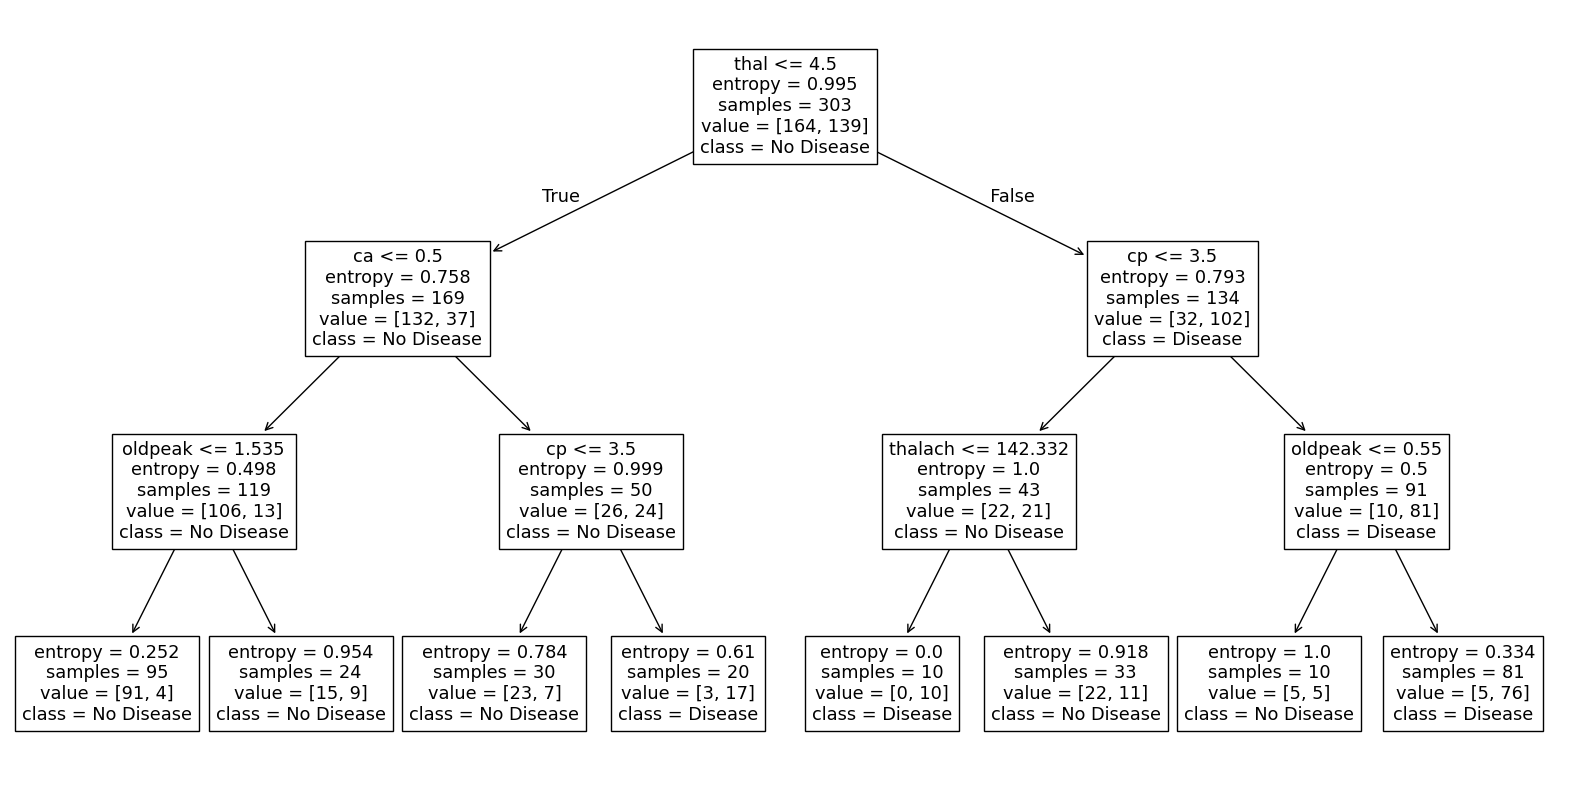

In [442]:
# plot your tree here.
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(final_tree, feature_names=X.columns, class_names=["No Disease", "Disease"])
plt.show()

The most important/relevant feature is thal. This is because it is at the highest level of the tree and it makes the first split.